In [15]:
#Kmer clustering


import pandas as pd
import numpy as np

In [16]:
genome='ACTTAGACCGGTTATACCCACAATATACCAATTTGGCCCTTAAAAGGTTAGGATACATAGGATACATAGGATACATAGATTACATAGATTACATAGGGACATTAGGAAAATACCAGGATATATACAGTAACGTACATGACAGATCAGTAGCATGGATC'

In [17]:
def de_bruijn_ize(st, k):
    """ Return a list holding, for each k-mer, its left
        k-1-mer and its right k-1-mer in a pair """
    edges = []
    nodes = set()
    for i in range(len(st) - k + 1):
        edges.append((st[i:i+k-1], st[i+1:i+k]))
        nodes.add(st[i:i+k-1])
        nodes.add(st[i+1:i+k])
    return nodes, edges

In [18]:
nodes, edges = de_bruijn_ize(genome, 8)

In [19]:
lines=np.array(list(nodes))

In [20]:
import scipy.io

from numpy import argmax

X=[]

for i in range(0,len(lines)):
    
    data=lines[i]
    alphabet = 'ATGC'
# define a mapping of chars to integers
    char_to_int = dict((c, i) for i, c in enumerate(alphabet))
    int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# integer encode input data
    integer_encoded = [char_to_int[char] for char in data]
    X.append(integer_encoded)

X=np.array(X)

In [21]:
from sklearn.cluster import KMeans

In [27]:
#PCA for Kmeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [29]:
#Figuring out Optimal number of clusters

def kmeanscost(K):
    kmeans = KMeans(n_clusters=K, random_state=0).fit(X)
    c=0
    m=X.shape[0]
    for i in range(0,m):
        c = c+np.dot((X[i,:]-kmeans.cluster_centers_[kmeans.labels_[i]]),((X[i,:]-kmeans.cluster_centers_[kmeans.labels_[i]])))
    cost = (1/float(m))*c 
    return (cost)

#Just trying for 10 clusters. Adjust to determine optimal number of clusters.
max_clusters=10
costs = []
for i in range(1,max_clusters+1):
    costs.append(kmeanscost(i))

In [30]:
#Kmeans
kmeans = KMeans(n_clusters=30, random_state=0, ).fit(principalComponents)

y_kmeans=kmeans.predict(principalComponents)

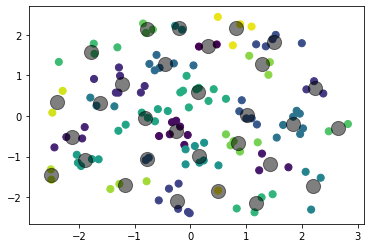

In [31]:
import matplotlib.pyplot as plt
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [32]:
#Nearest neighbors

from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(principalComponents)

In [33]:
distances, indices = nbrs.kneighbors(principalComponents)

In [34]:
indices

array([[  0, 102,  78],
       [  1,  25, 106],
       [  2,  52,  66],
       [  3,  75, 125],
       [  4,  31,  21],
       [  5,  85, 103],
       [  6,  53,  79],
       [  7,  15,  68],
       [  8,  68,  88],
       [  9,  30,  91],
       [ 10, 109,  59],
       [ 11,  42,  87],
       [ 12,  16,  45],
       [ 13,  22,  57],
       [ 14,  58,  97],
       [ 15,   7,  97],
       [ 16,  12,  22],
       [ 17, 103,  85],
       [ 18,  77,  90],
       [ 19, 107,  38],
       [ 20, 110,  49],
       [ 21,  72,  62],
       [ 22,  13,  57],
       [ 23,  92,  66],
       [ 24,   0, 102],
       [ 25,  55,  36],
       [ 26,  34, 118],
       [ 27,  94, 119],
       [ 28,  80, 111],
       [ 29,  35,  82],
       [ 30,  49,   9],
       [ 31,   4,  21],
       [ 32,  40,  81],
       [ 33,  34,  88],
       [ 34,  33,  61],
       [ 35,  29,  82],
       [ 36,  41,  25],
       [ 37,  95,  92],
       [ 38, 122, 107],
       [ 39,  67, 104],
       [ 40,  32,  38],
       [ 41,  44